In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df = pd.read_csv("../../../data/superstore.csv", encoding="latin-1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [105]:
df = df.dropna()
df = df.drop_duplicates()

In [106]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])
df["Total Sales"] = df["Sales"] * df["Quantity"]
df["Year"] = df["Order Date"].dt.year

In [107]:
# cantidad de ventas q se hizo en los diferentes meses del año 2017
df_cantidad_ventas = df[df["Year"] == 2017].groupby(df["Order Date"].dt.month).size()
print(df_cantidad_ventas)


Order Date
1     155
2     107
3     238
4     203
5     242
6     245
7     226
8     218
9     459
10    298
11    459
12    462
dtype: int64


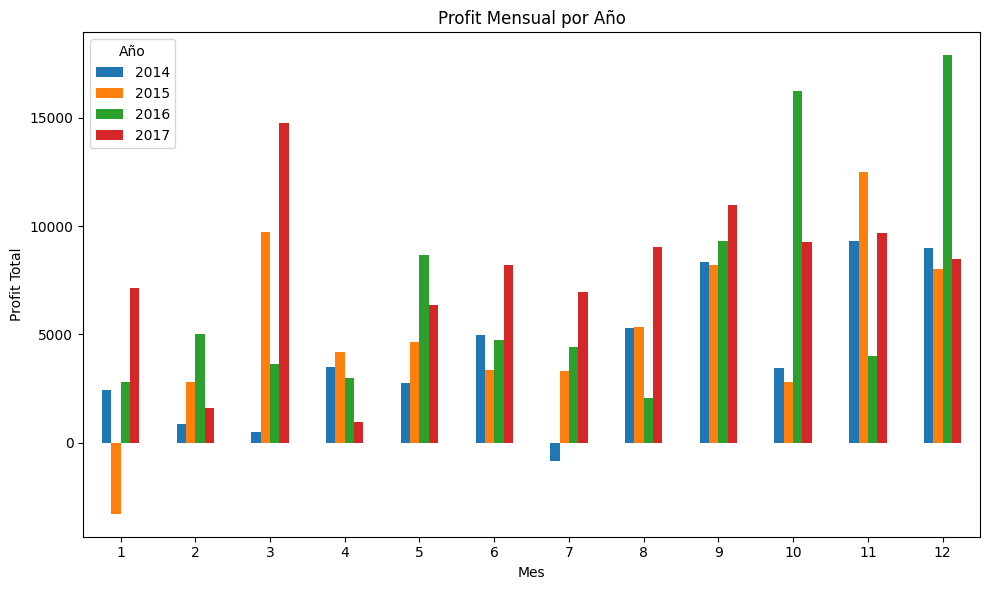

In [108]:
# ver profit mejoro o se mantuvo igual, en base a los años
df_monthly_profit = df.groupby([df["Order Date"].dt.month, "Year"])["Profit"].sum().unstack().plot(kind="bar", figsize=(10, 6))
plt.title("Profit Mensual por Año")
plt.xlabel("Mes")
plt.ylabel("Profit Total")
plt.xticks(rotation=0)
plt.legend(title="Año")
plt.tight_layout()
plt.show()


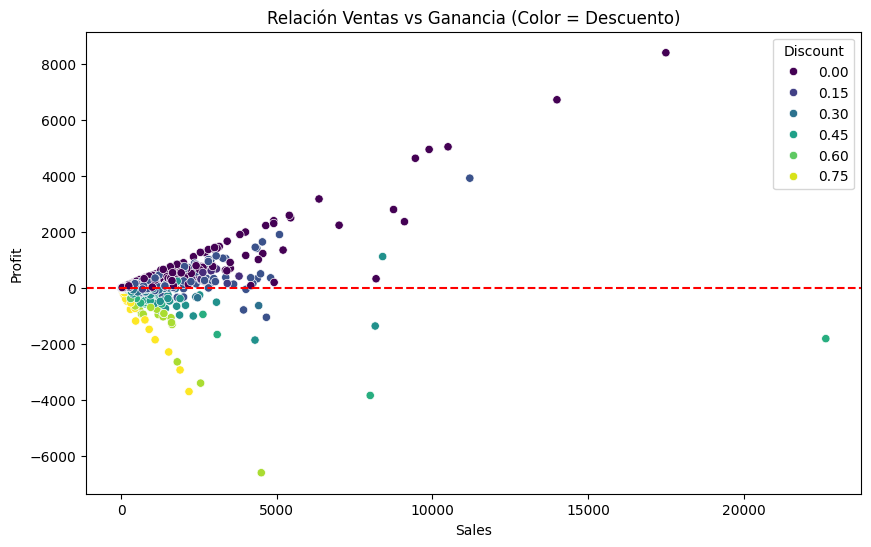

In [109]:
# Este gráfico te dice: ¿A más ventas, más ganancia? 
# Y los colores te dicen si el descuento influye.
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Discount', palette='viridis')
plt.title('Relación Ventas vs Ganancia (Color = Descuento)')
plt.axhline(0, color='red', linestyle='--') # Línea de "cero" ganancia
plt.show()

In [110]:
# ver cuanto descuento tiene cada estado
df_state_discount = df.groupby("State")["Discount"].mean().sort_values(ascending=False)
print(df_state_discount)

State
Illinois                0.390041
Texas                   0.370193
Pennsylvania            0.328620
Ohio                    0.324947
Colorado                0.316484
Arizona                 0.303571
Florida                 0.299347
Tennessee               0.291257
Oregon                  0.288710
North Carolina          0.283534
Wyoming                 0.200000
Idaho                   0.085714
West Virginia           0.075000
California              0.072764
Montana                 0.066667
Washington              0.064032
Nevada                  0.061538
Utah                    0.060377
New Mexico              0.059459
New York                0.055319
Rhode Island            0.021429
Massachusetts           0.015556
New Hampshire           0.011111
Connecticut             0.007317
Michigan                0.007059
Delaware                0.006250
Maryland                0.005714
New Jersey              0.004615
Alabama                 0.000000
Indiana                 0.000000
Geor

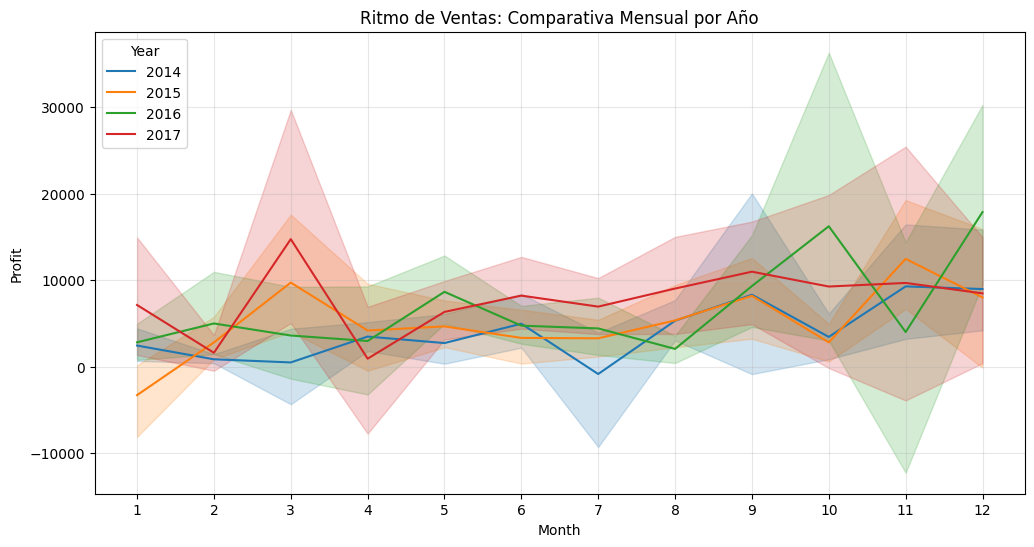

In [111]:
# Creamos columnas de Mes y Año para facilitar el gráfico
df['Month'] = df['Order Date'].dt.month

plt.figure(figsize=(12,6))
# Graficamos las ventas mensuales divididas por año
sns.lineplot(data=df, x='Month', y='Profit', hue='Year', estimator='sum', palette='tab10')

plt.title('Ritmo de Ventas: Comparativa Mensual por Año')
plt.xticks(range(1, 13)) # Que se vean todos los meses del 1 al 12
plt.grid(True, alpha=0.3)
plt.show()